In [16]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### Load in the tidy numbers file from summary_data

In [17]:
all_runs = pd.read_csv("summary_data/tidy_numbers.csv")
# Jump through some hopes to reomve suspect data...
numerical=all_runs.iloc[:,2:]
numerical.mask(abs(numerical) > 1e8, np.nan,inplace=True)
#numerical.mask(abs(numerical) < 1e-6, np.nan,inplace=True)
all_runs.iloc[:,2:]=numerical
all_runs[10:20]

,model,experiment,years,GMTemp,DMI mean,DMI stddev,Nino34 stddev,TIO mean,IOBM,DMI AnnCycAmp,...,SASmonsoon area stddev,SASmonsoon rain stddev,SAS rain ann,SAS rain jja,SAS rain djf,SAS rain jja stddev,SAS rain djf stddev,r(nino34.iod),r(iod.iobm),r(iod.eeio)
10,C20-Reanalysis,C20-Reanalysis,180,287.60800,-0.365643,0.462645,0.779520,300.9600,0.308001,1.58310,...,166438,0.946692,3.24345,1.65523,3.25685,0.341243,0.577757,0.291031,0.443547,0.326171
11,CCSM4,abrupt4xCO2,150,18.07610,0.117995,0.608249,0.946190,31.1173,0.222118,1.53052,...,306662,0.740890,4.17644,1.62533,4.73614,0.407974,0.636126,0.538993,-0.072924,-0.583394
12,CCSM4,lgm-cal-adj,101,8.41792,0.673468,0.583616,0.873097,25.4743,0.217999,1.95844,...,243113,0.315020,2.96133,1.61864,3.04229,0.344236,0.411293,0.362245,0.119731,-0.589374
13,CCSM4,midHolocene-cal-adj,301,13.13100,0.248633,0.466534,1.007980,27.4511,0.243462,2.66298,...,264294,0.489428,3.67399,1.25455,4.19917,0.264954,0.417457,0.490783,-0.182024,-0.711654
14,CCSM4,piControl,1051,13.33400,0.025755,0.607003,1.050230,27.7462,0.241117,1.83695,...,245499,0.537577,3.69462,1.59513,3.92245,0.378642,0.455355,0.514451,0.040991,-0.548138
15,CESM2,abrupt4xCO2,149,21.07400,0.367934,0.289847,0.671710,34.2725,0.196128,2.06702,...,317391,0.790140,3.63286,1.70453,4.16884,0.408396,0.915534,-0.033327,-0.130977,-0.202696
16,CESM2,lig127k-cal-adj,700,14.10540,-0.098658,0.558744,0.913569,28.0942,0.217860,2.06687,...,265666,0.694013,3.67646,1.25439,3.88570,0.230695,0.805942,0.403607,-0.050624,-0.275427
17,CESM2,midHolocene-cal-adj,700,13.90350,0.052096,0.600429,1.040810,27.9817,0.228877,1.59604,...,331910,0.697837,3.15759,1.09237,3.48496,0.212523,0.707402,0.454015,0.144076,-0.222828
18,CESM2,piControl,500,14.05200,-0.009576,0.663273,1.140690,28.3466,0.239930,1.15736,...,321207,0.641189,3.13267,1.34886,3.06565,0.278664,0.721443,0.387233,0.202618,-0.120239
19,CNRM-CM5,abrupt4xCO2,150,18.34700,-0.046751,0.674241,0.907346,30.6488,0.298098,1.79496,...,253757,0.484567,3.49824,2.07366,3.57970,0.306423,0.453128,0.686643,-0.054471,-0.661535


Select the lgm runs (we'll take the calednar adjusted ones).

Then duplicate this and populate with the piControl equivalent numbers

In [18]:
lgm=all_runs.loc[all_runs['experiment'] == 'lgm-cal-adj']
lgm.set_index('model', inplace = True)
all_pis=all_runs.loc[all_runs['experiment'] == 'piControl']
all_pis.set_index('model', inplace = True)
lgm_pis=all_pis[all_pis.index.isin(lgm.index)]
# drop the experiment and years columns
lgm_pis.drop(['experiment','years'],axis=1, inplace=True)
lgm.drop(['experiment','years'],axis=1, inplace=True)
# Create a difference grid
lgm_diff=lgm-lgm_pis
lgm_diff['experiment']='lgm'
lgm_diff['run']=list(range(0,np.size(lgm.index)))
lgm_diff.reset_index(inplace=True)
lgm_diff.set_index('run',inplace=True)
lgm_diff

,model,GMTemp,DMI mean,DMI stddev,Nino34 stddev,TIO mean,IOBM,DMI AnnCycAmp,EEIO mean,EEIO stddev,...,SASmonsoon rain stddev,SAS rain ann,SAS rain jja,SAS rain djf,SAS rain jja stddev,SAS rain djf stddev,r(nino34.iod),r(iod.iobm),r(iod.eeio),experiment
run,,,,,,,,,,,,,,,,,,,,,
0,AWI-ESM-1-1-LR,-3.71394,0.551941,0.002963,0.146279,-1.7591,0.018858,-0.51273,-1.4864,0.028512,...,-0.027591,-0.69212,0.027800,-1.06440,-0.017677,-0.113179,-0.076737,0.024378,0.025874,lgm
1,CCSM4,-4.91608,0.647713,-0.023387,-0.177133,-2.2719,-0.023118,0.12149,-1.8621,-0.034798,...,-0.222557,-0.73329,0.023510,-0.88016,-0.034406,-0.044062,-0.152206,0.078740,-0.041236,lgm
2,CNRM-CM5,-2.63480,0.648283,-0.043482,0.020978,-1.3183,0.000774,0.38769,-1.1661,-0.025917,...,-0.061401,-0.12310,-0.094960,-0.25480,-0.012153,-0.018792,-0.000186,0.021799,-0.083667,lgm
3,COSMOS-ASO,-5.47037,0.143140,-0.022787,0.003940,-3.3779,0.168576,0.65740,-3.1416,0.149822,...,-0.016516,-0.26899,0.289086,-0.47727,0.092548,0.040416,-0.020297,-0.176943,-0.165868,lgm
4,FGOALS-g2,-4.58484,0.852853,-0.112132,-0.348958,-3.0678,-0.053093,0.71457,-3.1809,-0.058592,...,-0.664636,-0.32790,-0.120490,-0.47530,-0.036813,-0.088272,-0.176191,-0.115578,-0.020579,lgm
5,GISS-E2-R,-4.80725,0.898448,-0.013454,-0.162594,-2.3011,-0.029133,-0.05564,-2.0151,-0.058095,...,-0.184239,-0.70671,-0.438600,-0.65786,-0.054538,-0.045812,-0.188789,-0.024309,-0.089625,lgm
6,INM-CM4-8,-3.72303,0.198667,0.012234,0.076214,-1.8552,0.029414,0.04791,-1.4682,0.008280,...,-0.009709,-1.60721,-0.686790,-2.35016,-0.096780,-0.223320,0.090847,0.434960,0.414367,lgm
7,IPSL-CM5A-LR,-4.59955,0.387069,0.055710,0.222348,-3.0342,0.068717,1.19536,-2.9640,0.107243,...,0.093832,-0.65531,-0.140968,-1.24195,-0.056897,-0.136972,0.036152,0.066473,-0.032905,lgm
8,MIROC-ES2L,-4.04850,0.203450,-0.010390,-0.156850,-2.1518,-0.040917,0.33385,-2.0723,-0.037159,...,0.000629,-1.13422,-0.928580,-1.03883,-0.049006,-0.039629,0.004853,0.136239,0.099239,lgm


In [19]:
lig127k=all_runs.loc[all_runs['experiment'] == 'lig127k-cal-adj']
lig127k.set_index('model', inplace = True)
lig127k_pis=all_pis[all_pis.index.isin(lig127k.index)]
# drop the experiment and years columns
lig127k_pis.drop(columns=['experiment','years'],inplace=True)
lig127k.drop(columns=['experiment','years'],inplace=True)
# Create a difference grid
lig127k_diff=lig127k-lig127k_pis
lig127k_diff['experiment']='lig127k'
lig127k_diff['run']=list(range(50,50+np.size(lig127k.index)))
lig127k_diff.reset_index(inplace=True)
lig127k_diff.set_index('run',inplace=True)
lig127k_pcts=100*(lig127k-lig127k_pis)/lig127k_pis
lig127k_diff

,model,GMTemp,DMI mean,DMI stddev,Nino34 stddev,TIO mean,IOBM,DMI AnnCycAmp,EEIO mean,EEIO stddev,...,SASmonsoon rain stddev,SAS rain ann,SAS rain jja,SAS rain djf,SAS rain jja stddev,SAS rain djf stddev,r(nino34.iod),r(iod.iobm),r(iod.eeio),experiment
run,,,,,,,,,,,,,,,,,,,,,
50,ACCESS-ESM1-5,0.5720,0.380428,-0.110346,-0.100232,-0.0327,-0.008726,1.169990,-0.3045,0.118662,...,0.370125,1.34202,0.029040,1.68090,-0.022997,0.252981,-0.002236,-0.396669,-0.579681,lig127k
51,AWI-ESM-1-1-LR,-0.0981,0.292150,0.165178,-0.147396,-0.0625,0.012138,-0.534110,0.0648,0.086554,...,0.062516,0.65225,0.542490,0.88837,0.020565,-0.155320,-0.171589,-0.188078,-0.268052,lig127k
52,CESM2,0.0534,-0.089082,-0.104529,-0.227121,-0.2524,-0.022070,0.909510,-0.3357,0.027193,...,0.052824,0.54379,-0.094470,0.82005,-0.047969,0.084499,0.016374,-0.253242,-0.155188,lig127k
53,CNRM-CM6-1,0.4924,0.034713,-0.106022,-0.195641,0.1588,-0.019936,0.344760,0.0011,0.020968,...,-0.003420,0.67320,0.069870,0.85391,-0.002314,-0.051740,-0.005985,-0.195715,-0.079671,lig127k
54,FGOALS-f3-L,-0.2616,0.237927,-0.156729,-0.270160,-0.4511,-0.043810,1.351270,-0.7286,0.048371,...,-0.055495,0.62432,0.061980,0.30416,-0.033644,-0.091498,0.023861,-0.073082,-0.093815,lig127k
55,FGOALS-g3,0.4364,0.216806,-0.234014,-0.275393,-0.3288,-0.007220,1.117370,-0.4597,0.080274,...,-0.104757,0.07377,-0.162993,-0.14824,-0.062848,-0.059443,-0.031756,-0.323807,-0.172247,lig127k
56,GISS-E2-1-G,0.0188,0.178953,-0.027694,0.003790,-0.3370,0.010050,0.934143,-0.4748,0.123033,...,0.250914,0.82025,-0.026680,0.56710,-0.036530,0.023979,-0.022203,-0.214391,-0.358423,lig127k
57,INM-CM4-8,-0.0185,0.410162,0.026308,0.046921,-0.1012,0.005248,1.060160,-0.1857,0.111944,...,-0.021623,0.05315,-0.194440,-0.09720,-0.072122,-0.059839,-0.185096,-0.018069,-0.351935,lig127k
58,IPSL-CM6A-LR,0.0637,0.575352,0.067117,-0.168876,-0.2376,0.008720,1.737720,-0.6923,0.256941,...,0.063729,0.57346,0.011620,0.48350,0.192977,-0.081712,0.074212,-0.608219,-0.909709,lig127k


In [20]:
midHolocene=all_runs.loc[all_runs['experiment'] == 'midHolocene-cal-adj']
midHolocene.set_index('model', inplace = True)
midHolocene_pis=all_pis[all_pis.index.isin(midHolocene.index)]
# drop the experiment and years columns
midHolocene_pis.drop(['experiment','years'],axis=1, inplace=True)
midHolocene.drop(['experiment','years'],axis=1, inplace=True)
# Create a difference grid
midHolocene_diff=midHolocene-midHolocene_pis
midHolocene_diff['experiment']='midHolocene'
midHolocene_diff['run']=list(range(100,100+np.size(midHolocene.index)))
midHolocene_diff.reset_index(inplace=True)
midHolocene_diff.set_index('run',inplace=True)
midHolocene_pcts=100*(midHolocene-midHolocene_pis)/midHolocene_pis
midHolocene_diff

,model,GMTemp,DMI mean,DMI stddev,Nino34 stddev,TIO mean,IOBM,DMI AnnCycAmp,EEIO mean,EEIO stddev,...,SASmonsoon rain stddev,SAS rain ann,SAS rain jja,SAS rain djf,SAS rain jja stddev,SAS rain djf stddev,r(nino34.iod),r(iod.iobm),r(iod.eeio),experiment
run,,,,,,,,,,,,,,,,,,,,,
100,AWI-ESM-1-1-LR,-0.3768,0.135870,0.006263,-0.038755,-0.3420,-0.015385,-0.243480,-0.3078,-0.014818,...,0.080740,-0.00893,-0.118268,0.46614,-0.053149,-0.117399,0.095675,-0.068353,0.073643,midHolocene
101,BCC-CSM1-1,-0.0821,0.095507,-0.075726,-0.032692,-0.4033,-0.001195,0.060770,-0.5559,-0.036989,...,-0.169583,0.19710,-0.163563,0.33186,-0.072608,-0.035041,-0.035873,0.024937,0.076528,midHolocene
102,CCSM4,-0.2030,0.222878,-0.140469,-0.042250,-0.2951,0.002345,0.826030,-0.4725,0.027035,...,-0.048149,-0.02063,-0.340580,0.27672,-0.113688,-0.037898,-0.023668,-0.223015,-0.163516,midHolocene
103,CESM2,-0.1485,0.061672,-0.062844,-0.099880,-0.3649,-0.011053,0.438680,-0.4046,0.013140,...,0.056648,0.02492,-0.256490,0.41931,-0.066141,-0.014041,0.066782,-0.058542,-0.102589,midHolocene
104,CNRM-CM5,0.2430,0.179134,-0.079130,-0.071819,-0.0883,0.062356,0.178970,-0.2075,0.035412,...,0.017771,0.14380,-0.172210,0.42412,-0.022219,0.085269,-0.018666,-0.086305,-0.012988,midHolocene
105,CSIRO-Mk3-6-0,0.0780,0.299937,0.270813,0.125861,-0.2004,0.015896,1.270710,-0.3496,0.296218,...,-0.029010,0.26519,0.060433,0.53531,0.027685,0.157443,-0.003309,-0.118263,-0.692121,midHolocene
106,CSIRO-Mk3L-1-2,0.0517,0.042917,-0.036058,-0.093669,-0.3013,-0.003138,0.259750,-0.3106,0.050087,...,-0.266822,0.09633,-0.132175,0.33136,-0.089094,0.000485,-0.080001,-0.104433,-0.200470,midHolocene
107,EC-Earth3-LR,0.0172,0.504303,-0.153937,-0.088837,-0.4121,0.004661,0.728960,-0.7425,0.022380,...,0.009503,0.24185,-0.198118,0.60038,-0.042091,-0.057890,-0.170254,-0.287094,-0.152205,midHolocene
108,FGOALS-f3-L,-0.3066,0.225118,-0.064396,-0.028010,-0.4719,-0.005579,0.865100,-0.6659,0.109828,...,0.029456,0.13882,-0.034499,0.21713,-0.061556,-0.058755,0.048097,-0.083567,-0.123405,midHolocene


In [21]:
abrupt4xCO2=all_runs.loc[all_runs['experiment'] == 'abrupt4xCO2']
abrupt4xCO2.set_index('model', inplace = True)
abrupt4xCO2_pis=all_pis[all_pis.index.isin(abrupt4xCO2.index)]
# drop the experiment and years columns
abrupt4xCO2_pis.drop(['experiment','years'],axis=1, inplace=True)
abrupt4xCO2.drop(['experiment','years'],axis=1, inplace=True)
# Create a difference grid
abrupt4xCO2_diff=abrupt4xCO2-abrupt4xCO2_pis
# add back in the experiment name
abrupt4xCO2_diff['experiment']='abrupt4xCO2'
abrupt4xCO2_diff['run']=list(range(150,150+np.size(abrupt4xCO2.index)))
abrupt4xCO2_diff.reset_index(inplace=True)
abrupt4xCO2_diff.set_index('run',inplace=True)

In [22]:
abrupt4xCO2_diff

,model,GMTemp,DMI mean,DMI stddev,Nino34 stddev,TIO mean,IOBM,DMI AnnCycAmp,EEIO mean,EEIO stddev,...,SASmonsoon rain stddev,SAS rain ann,SAS rain jja,SAS rain djf,SAS rain jja stddev,SAS rain djf stddev,r(nino34.iod),r(iod.iobm),r(iod.eeio),experiment
run,,,,,,,,,,,,,,,,,,,,,
150,ACCESS-ESM1-5,4.6409,0.728535,-0.087504,0.355845,4.0183,0.030455,0.435440,3.8782,0.110588,...,0.271306,0.83514,0.510120,0.95019,0.129131,0.154804,0.192130,-0.030769,-0.198475,abrupt4xCO2
151,BCC-CSM1-1,4.8080,0.235581,-0.075977,-0.066542,3.5299,0.006036,-0.293180,3.2835,-0.024759,...,0.268000,0.87147,0.088093,0.80695,0.148490,0.241169,-0.031130,0.099901,0.110504,abrupt4xCO2
152,CCSM4,4.7421,0.092240,0.001246,-0.104040,3.3711,-0.018999,-0.306430,3.2192,0.052064,...,0.203313,0.48182,0.030200,0.81369,0.029332,0.180771,0.024542,-0.113915,-0.035256,abrupt4xCO2
153,CESM2,7.0220,0.377510,-0.373426,-0.468980,5.9259,-0.043802,0.909660,5.6097,-0.077950,...,0.148951,0.50019,0.355670,1.10319,0.129732,0.194091,-0.420560,-0.333595,-0.082457,abrupt4xCO2
154,CNRM-CM5,5.1466,0.090614,0.052088,0.096833,3.6493,0.062901,-0.366730,3.5782,0.071617,...,-0.029788,0.55821,0.386840,0.59864,0.032002,0.087965,0.252230,-0.108110,-0.201361,abrupt4xCO2
155,CNRM-CM6-1,6.6769,0.190664,-0.145790,0.135170,5.0540,0.038602,0.082620,4.8594,-0.048933,...,0.014099,0.40709,0.158930,0.74460,-0.001287,0.006911,-0.045119,-0.167085,0.100802,abrupt4xCO2
156,CSIRO-Mk3-6-0,5.5097,1.350144,-0.137955,0.286070,4.9441,0.023184,1.858700,4.6185,0.174592,...,0.448619,0.41341,0.331695,0.85574,0.018918,0.105059,-0.561308,-0.291183,-0.825287,abrupt4xCO2
157,FGOALS-f3-L,5.0053,0.517672,-0.175195,-0.045580,3.7071,-0.019666,0.445880,3.3405,0.110670,...,0.171076,0.83413,-0.003773,1.07098,-0.002213,0.239889,-0.005068,-0.339238,-0.202035,abrupt4xCO2
158,FGOALS-g2,5.0636,0.084842,-0.053983,-0.179173,3.8195,-0.054299,-0.184110,3.6820,-0.085098,...,-0.353460,0.28132,-0.084460,0.07630,-0.049018,0.053295,-0.155799,0.033506,-0.037148,abrupt4xCO2


In [23]:
all_diffs=pd.concat([lgm_diff,midHolocene_diff,lig127k_diff,abrupt4xCO2_diff])
not_abrup4xCO2_diffs=pd.concat([lgm_diff,midHolocene_diff,lig127k_diff])
orb_diffs=pd.concat([midHolocene_diff,lig127k_diff])

In [24]:
# Add some colors to allow for convenient plotting...
all_diffs['color'] = all_diffs['experiment']
all_diffs['color'] = all_diffs['color'].map({'lgm':'tab:blue',
                             'midHolocene':'tab:olive',
                             'lig127k':'tab:green',
                             'abrupt4xCO2':'tab:red'},
                             na_action=None)

slope (95%): -0.014606 (-0.109060 to 0.079849)


<Figure size 640x480 with 0 Axes>

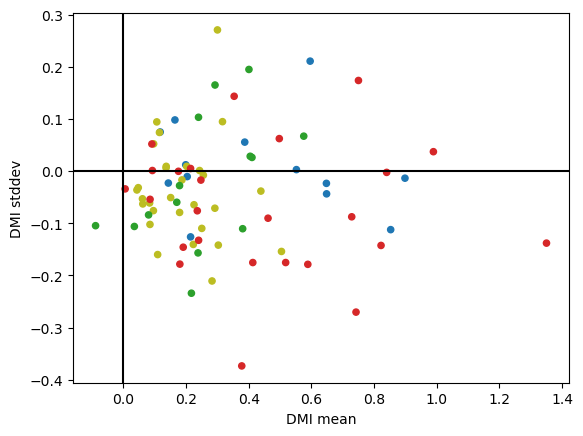

In [25]:
fig = plt.figure()
fig=all_diffs.plot.scatter(x='DMI mean',y='DMI stddev',c='color').get_figure()
plt.axhline(0,color='black')
plt.axvline(0,color='black')
res = stats.linregress(all_diffs['DMI mean'],all_diffs['DMI stddev'])
tinv = lambda p, df: abs(stats.t.ppf(p/2, df))
ts = tinv(0.05, len(all_diffs['DMI mean'])-2)
print(f"slope (95%): {res.slope:.6f} ({res.slope-ts*res.stderr:.6f} to {res.slope+ts*res.stderr:.6f})")
fig.savefig('plots/dmi_w_mean.pdf')

slope (95%): -0.068386 (-0.106323 to -0.030448)
slope (95%): -0.068386 (-0.106323 to -0.030448)


<Figure size 640x480 with 0 Axes>

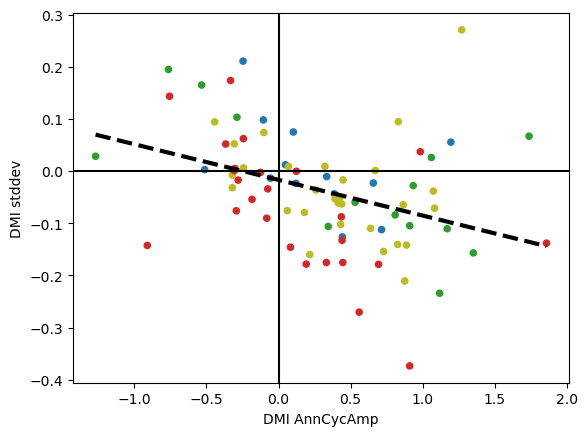

In [26]:
fig = plt.figure()
fig=all_diffs.plot.scatter(x='DMI AnnCycAmp',y='DMI stddev',c='color').get_figure()
plt.axhline(0,color='black')
plt.axvline(0,color='black')
res = stats.linregress(all_diffs['DMI AnnCycAmp'],all_diffs['DMI stddev'])
tinv = lambda p, df: abs(stats.t.ppf(p/2, df))
ts = tinv(0.05, len(all_diffs['DMI AnnCycAmp'])-2)
print(f"slope (95%): {res.slope:.6f} ({res.slope-ts*res.stderr:.6f} to {res.slope+ts*res.stderr:.6f})")
z = np.polyfit(all_diffs['DMI AnnCycAmp'],all_diffs['DMI stddev'], 1)
p = np.poly1d(z)
straight=np.array([min(all_diffs['DMI AnnCycAmp']),max(all_diffs['DMI AnnCycAmp'])])
plt.plot(straight,p(straight),color='black', linewidth=3, linestyle="--")
tinv = lambda p, df: abs(stats.t.ppf(p/2, df))
ts = tinv(0.05, len(all_diffs['DMI mean'])-2)
print(f"slope (95%): {res.slope:.6f} ({res.slope-ts*res.stderr:.6f} to {res.slope+ts*res.stderr:.6f})")
fig.savefig('plots/dmi_w_AnnCycAmp.pdf')

slope (95%): 0.156305 (0.030722 to 0.281888)
ORB-ONLY slope (95%): 0.178936 (-0.052639 to 0.410510)


<Figure size 640x480 with 0 Axes>

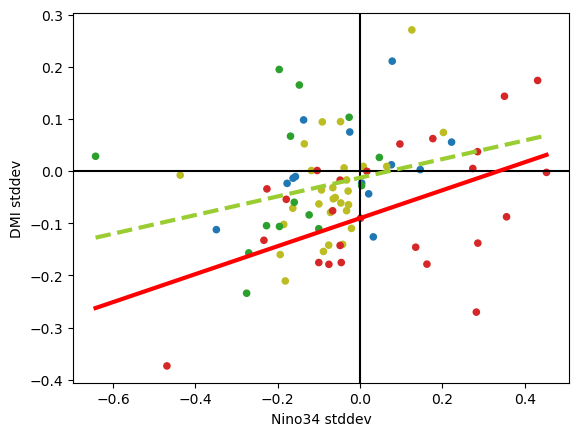

In [27]:
fig = plt.figure()
fig=all_diffs.plot.scatter(x='Nino34 stddev',y='DMI stddev',c='color').get_figure()
plt.axhline(0,color='black')
plt.axvline(0,color='black')
z = np.polyfit(abrupt4xCO2_diff['Nino34 stddev'],abrupt4xCO2_diff['DMI stddev'], 1)
p = np.poly1d(z)
straight=[min(all_diffs['Nino34 stddev']),max(all_diffs['Nino34 stddev'])]
plt.plot(straight,p(straight),color='red', linewidth=3)
z = np.polyfit(orb_diffs['Nino34 stddev'],orb_diffs['DMI stddev'], 1)
p = np.poly1d(z)
plt.plot(straight,p(straight),color='yellowgreen', linewidth=3, linestyle="--")
res = stats.linregress(all_diffs['Nino34 stddev'],all_diffs['DMI stddev'])
straight=np.array([min(all_diffs['Nino34 stddev']),max(all_diffs['Nino34 stddev'])])
tinv = lambda p, df: abs(stats.t.ppf(p/2, df))
ts = tinv(0.05, len(all_diffs['DMI mean'])-2)
print(f"slope (95%): {res.slope:.6f} ({res.slope-ts*res.stderr:.6f} to {res.slope+ts*res.stderr:.6f})")
fig.savefig('plots/iod_enso.pdf')
res = stats.linregress(orb_diffs['Nino34 stddev'],orb_diffs['DMI stddev'])
tinv = lambda p, df: abs(stats.t.ppf(p/2, df))
ts = tinv(0.05, len(orb_diffs['DMI mean'])-2)
print(f"ORB-ONLY slope (95%): {res.slope:.6f} ({res.slope-ts*res.stderr:.6f} to {res.slope+ts*res.stderr:.6f})")


slope (95%): 0.276216 (0.129209 to 0.423222)
ORB-ONLY slope (95%): 0.124988 (-0.067877 to 0.317854)


<Figure size 640x480 with 0 Axes>

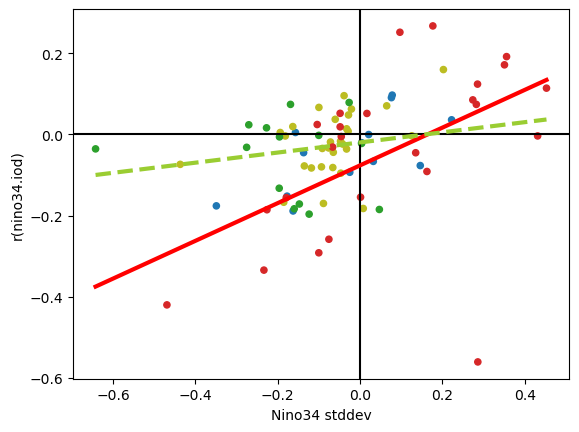

In [28]:
fig = plt.figure()
fig=all_diffs.plot.scatter(x='Nino34 stddev',y='r(nino34.iod)',c='color').get_figure()
plt.axhline(0,color='black')
plt.axvline(0,color='black')
z = np.polyfit(abrupt4xCO2_diff['Nino34 stddev'],abrupt4xCO2_diff['r(nino34.iod)'], 1)
p = np.poly1d(z)
straight=[min(all_diffs['Nino34 stddev']),max(all_diffs['Nino34 stddev'])]
plt.plot(straight,p(straight),color='red', linewidth=3)
z = np.polyfit(orb_diffs['Nino34 stddev'],orb_diffs['r(nino34.iod)'], 1)
p = np.poly1d(z)
plt.plot(straight,p(straight),color='yellowgreen', linewidth=3, linestyle="--")
res = stats.linregress(all_diffs['Nino34 stddev'],all_diffs['r(nino34.iod)'])
tinv = lambda p, df: abs(stats.t.ppf(p/2, df))
ts = tinv(0.05, len(all_diffs['DMI mean'])-2)
print(f"slope (95%): {res.slope:.6f} ({res.slope-ts*res.stderr:.6f} to {res.slope+ts*res.stderr:.6f})")
fig.savefig('plots/enso_role.pdf')

res = stats.linregress(orb_diffs['Nino34 stddev'],orb_diffs['r(nino34.iod)'])
tinv = lambda p, df: abs(stats.t.ppf(p/2, df))
ts = tinv(0.05, len(orb_diffs['DMI mean'])-2)
print(f"ORB-ONLY slope (95%): {res.slope:.6f} ({res.slope-ts*res.stderr:.6f} to {res.slope+ts*res.stderr:.6f})")


/home/ucfaccb/miniconda3/envs/my-cli-py/lib/python3.9/site-packages/statsmodels/robust/robust_linear_model.py:288: ConvergenceWarning: Estimated scale is 0.0 indicating that the most last iteration produced a perfect fit of the weighted data.
  warnings.warn('Estimated scale is 0.0 indicating that the most'


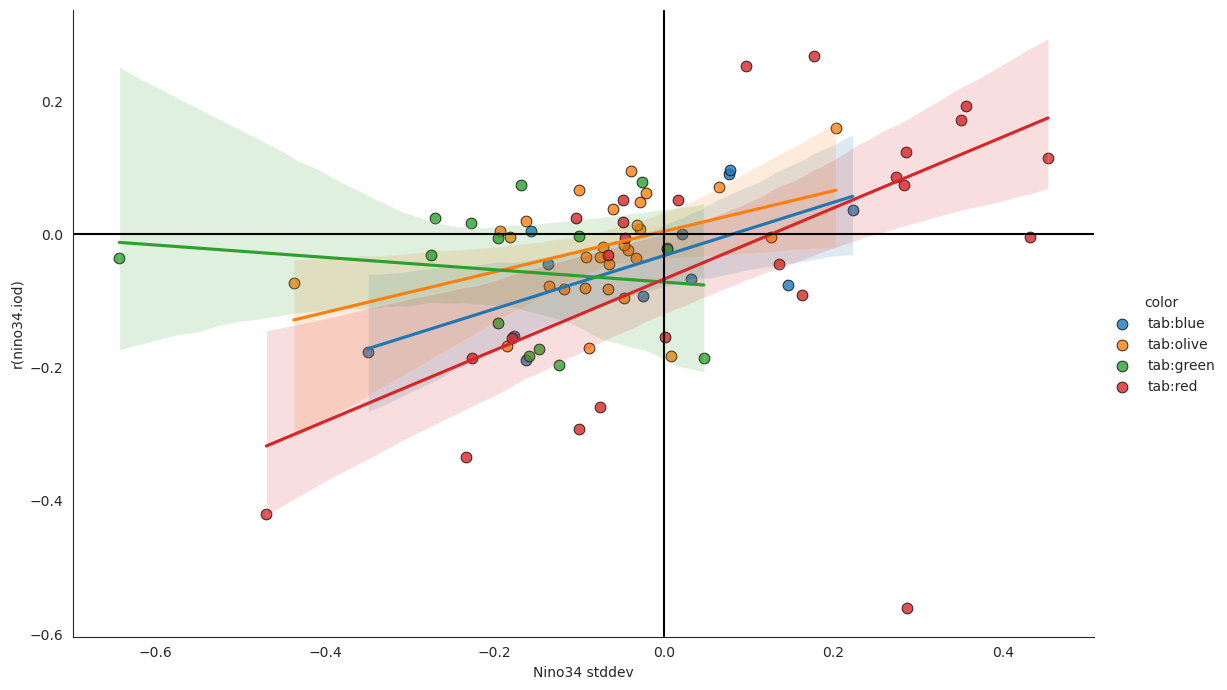

In [29]:
sns.set_style("white")
gridobj = sns.lmplot(x='Nino34 stddev', y='r(nino34.iod)', hue="color", data=all_diffs, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.axhline(0,color='black')
plt.axvline(0,color='black')
fig.savefig('plots/enso_role-sns.pdf')

slope (95%): 0.000611 (-0.003173 to 0.004395)
Average midHolocene IOBM change: -3.6593801927408482%
Average lig127k IOBM change: -6.412121346044413%


<Figure size 640x480 with 0 Axes>

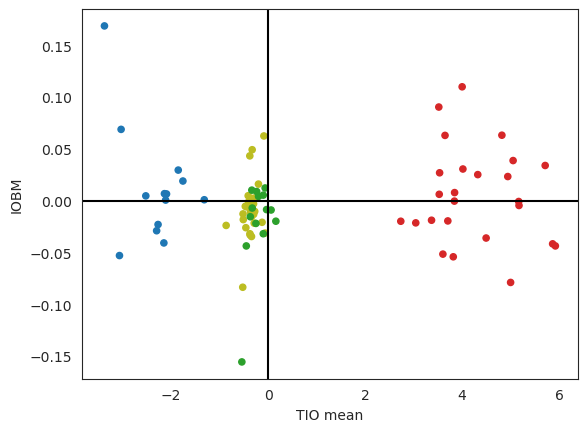

In [30]:
fig = plt.figure()
fig=all_diffs.plot.scatter(x='TIO mean',y='IOBM',c='color').get_figure()
plt.axhline(0,color='black')
plt.axvline(0,color='black')
fig.savefig('plots/iobm_w_mean.pdf')
res = stats.linregress(all_diffs['TIO mean'],all_diffs['IOBM'])
tinv = lambda p, df: abs(stats.t.ppf(p/2, df))
ts = tinv(0.05, len(all_diffs['DMI mean'])-2)
print(f"slope (95%): {res.slope:.6f} ({res.slope-ts*res.stderr:.6f} to {res.slope+ts*res.stderr:.6f})")
print(f"Average midHolocene IOBM change: {np.mean(midHolocene_pcts['IOBM'])}%")
print(f"Average lig127k IOBM change: {np.mean(lig127k_pcts['IOBM'])}%")

slope (95%): 0.163489 (0.129539 to 0.197438)


<Figure size 640x480 with 0 Axes>

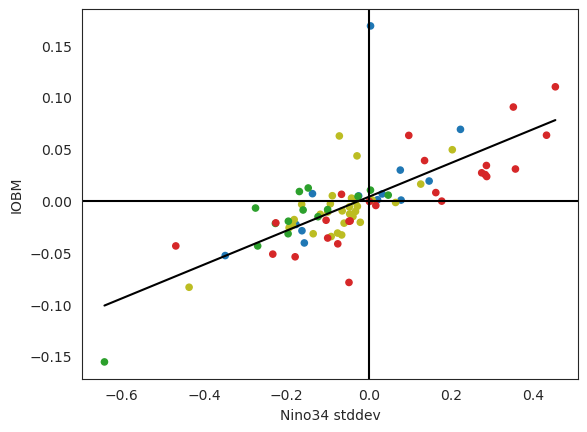

In [31]:
fig = plt.figure()
fig=all_diffs.plot.scatter(x='Nino34 stddev',y='IOBM',c='color').get_figure()
plt.axhline(0,color='black')
plt.axvline(0,color='black')
res = stats.linregress(all_diffs['Nino34 stddev'],all_diffs['IOBM'])
straight=np.array([min(all_diffs['Nino34 stddev']),max(all_diffs['Nino34 stddev'])])
plt.plot(straight,res.intercept + res.slope*straight,color='black')
tinv = lambda p, df: abs(stats.t.ppf(p/2, df))
ts = tinv(0.05, len(all_diffs['DMI mean'])-2)
print(f"slope (95%): {res.slope:.6f} ({res.slope-ts*res.stderr:.6f} to {res.slope+ts*res.stderr:.6f})")
fig.savefig('plots/iobm_enso.pdf')

slope (95%): -0.122102 (-0.415853 to 0.171650)


<Figure size 640x480 with 0 Axes>

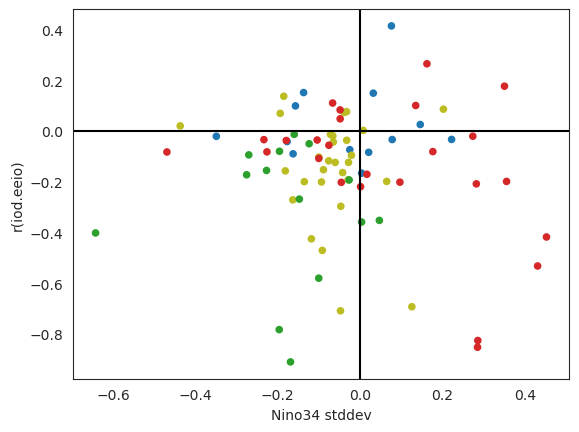

In [32]:
fig = plt.figure()
fig=all_diffs.plot.scatter(x='Nino34 stddev',y='r(iod.eeio)',c='color').get_figure()
plt.axhline(0,color='black')
plt.axvline(0,color='black')
fig.savefig('plots/reeio_enso.pdf')
res = stats.linregress(all_diffs['Nino34 stddev'],all_diffs['r(iod.eeio)'])
tinv = lambda p, df: abs(stats.t.ppf(p/2, df))
ts = tinv(0.05, len(all_diffs['DMI mean'])-2)
print(f"slope (95%): {res.slope:.6f} ({res.slope-ts*res.stderr:.6f} to {res.slope+ts*res.stderr:.6f})")

<Figure size 640x480 with 0 Axes>

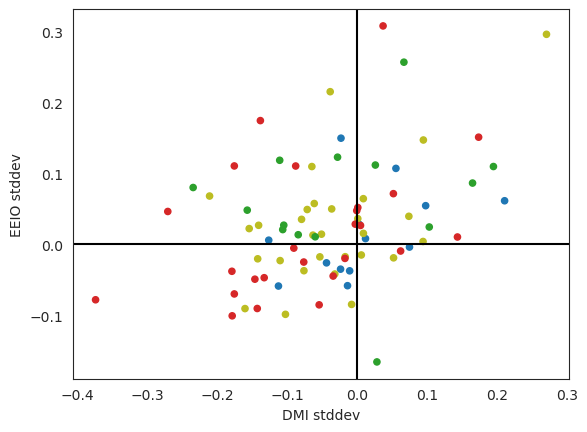

In [33]:
fig = plt.figure()
fig=all_diffs.plot.scatter(x='DMI stddev',y='EEIO stddev',c='color').get_figure()
plt.axhline(0,color='black')
plt.axvline(0,color='black')
res = stats.linregress(all_diffs['DMI stddev'],all_diffs['EEIO stddev'])
tinv = lambda p, df: abs(stats.t.ppf(p/2, df))
ts = tinv(0.05, len(all_diffs['DMI mean'])-2)
fig.savefig('plots/eeio_iod.pdf')

<Figure size 640x480 with 0 Axes>

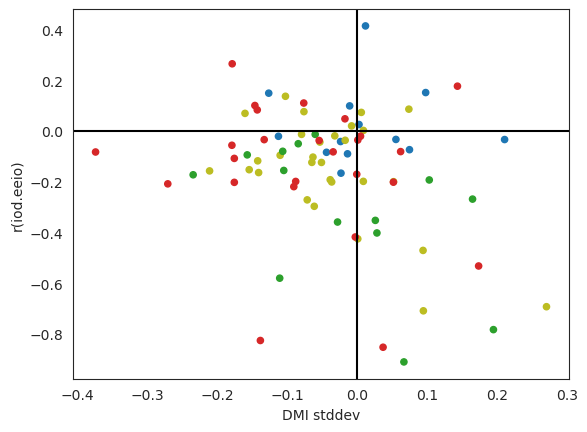

In [34]:
fig = plt.figure()
fig=all_diffs.plot.scatter(x='DMI stddev',y='r(iod.eeio)',c='color').get_figure()
plt.axhline(0,color='black')
plt.axvline(0,color='black')
res = stats.linregress(all_diffs['DMI stddev'],all_diffs['r(iod.eeio)'])
tinv = lambda p, df: abs(stats.t.ppf(p/2, df))
ts = tinv(0.05, len(all_diffs['DMI mean'])-2)
fig.savefig('plots/reeio_iod.pdf')

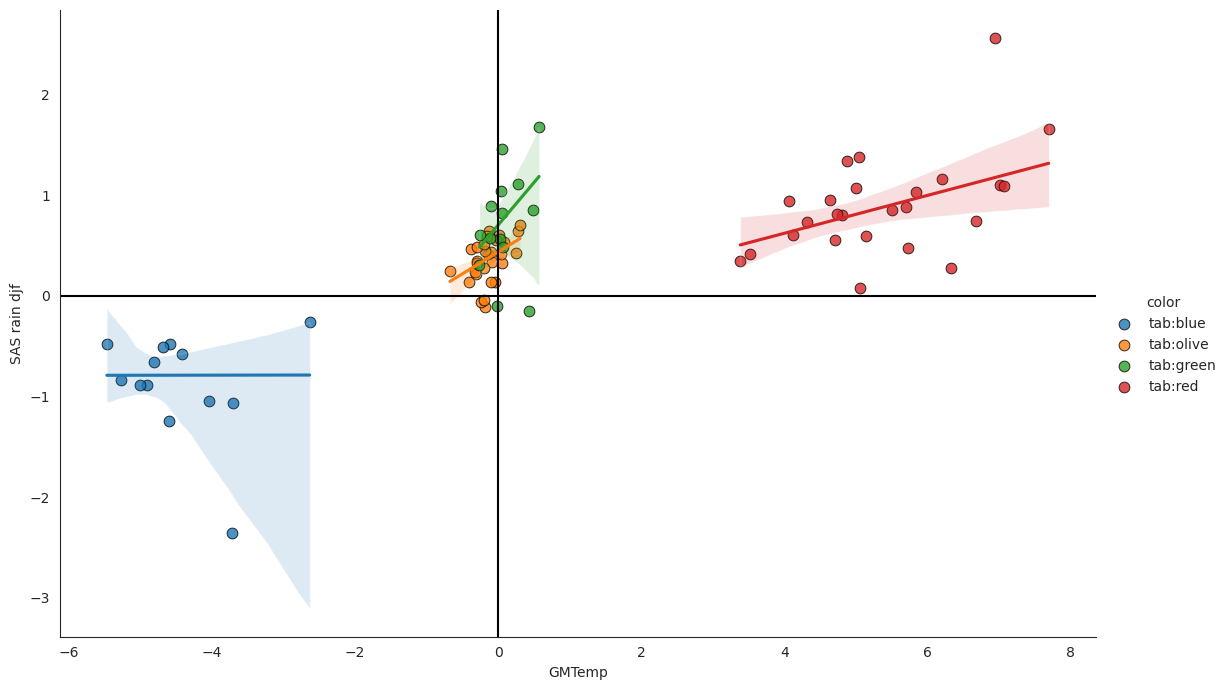

In [35]:
gridobj = sns.lmplot(x='GMTemp', y='SAS rain djf', hue="color", data=all_diffs, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.axhline(0,color='black')
plt.axvline(0,color='black')

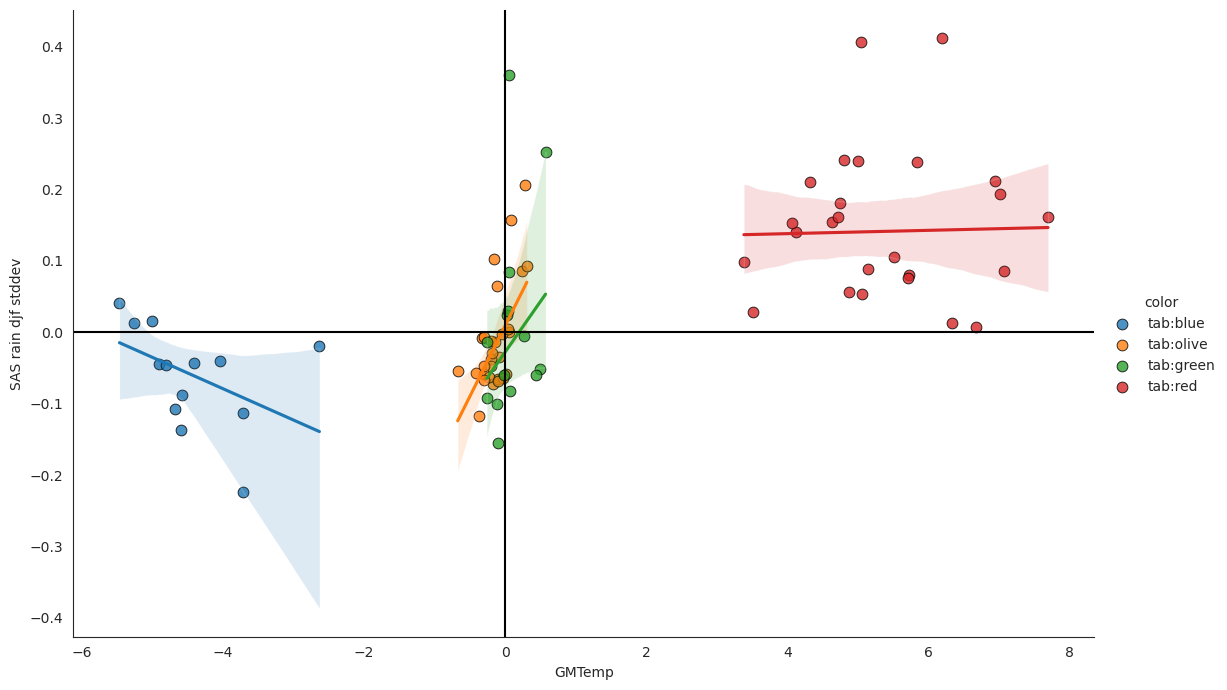

In [36]:
gridobj = sns.lmplot(x='GMTemp', y='SAS rain djf stddev', hue="color", data=all_diffs, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.axhline(0,color='black')
plt.axvline(0,color='black')

slope (95%): -0.179627 (-0.431264 to 0.072010)


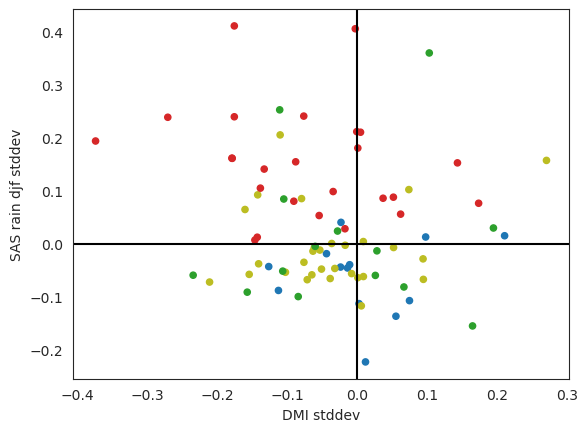

In [37]:
monsoon=all_diffs.plot.scatter(x='DMI stddev',y='SAS rain djf stddev',c='color')
monsoon.axhline(0,color='black')
monsoon.axvline(0,color='black')
res = stats.linregress(all_diffs['DMI stddev'],all_diffs['SAS rain djf stddev'])
print(f"slope (95%): {res.slope:.6f} ({res.slope-ts*res.stderr:.6f} to {res.slope+ts*res.stderr:.6f})")

slope (95%): 0.192000 (0.050015 to 0.333985)


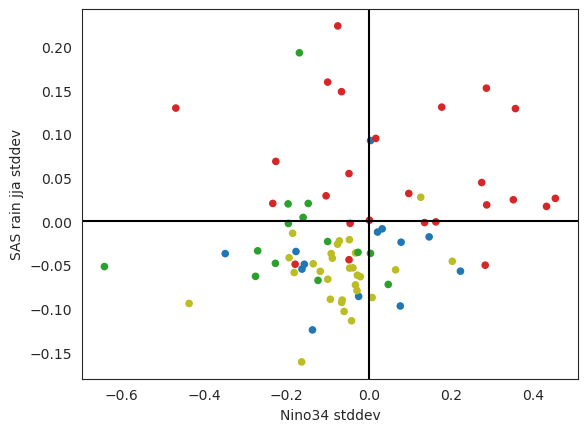

In [38]:
monsoon=all_diffs.plot.scatter(x='Nino34 stddev',y='SAS rain jja stddev',c='color')
monsoon.axhline(0,color='black')
monsoon.axvline(0,color='black')
res = stats.linregress(all_diffs['Nino34 stddev'],all_diffs['SAS rain djf stddev'])
print(f"slope (95%): {res.slope:.6f} ({res.slope-ts*res.stderr:.6f} to {res.slope+ts*res.stderr:.6f})")

slope (95%): 1.338108 (0.901277 to 1.774939)


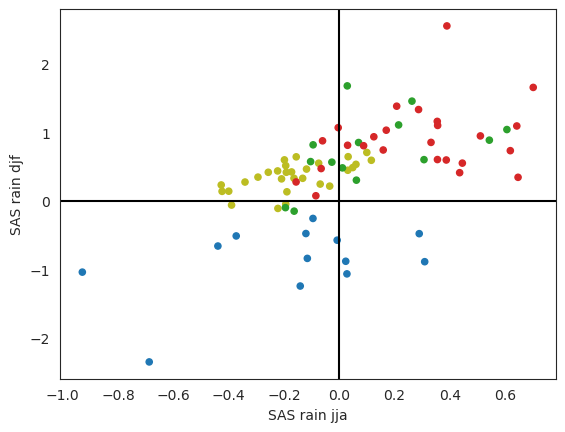

In [39]:
monsoon=all_diffs.plot.scatter(x='SAS rain jja',y='SAS rain djf',c='color')
monsoon.axhline(0,color='black')
monsoon.axvline(0,color='black')
res = stats.linregress(all_diffs['SAS rain jja'],all_diffs['SAS rain djf'])
print(f"slope (95%): {res.slope:.6f} ({res.slope-ts*res.stderr:.6f} to {res.slope+ts*res.stderr:.6f})")